In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv', error_bad_lines=False)

df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
#Verifica se tem NaN
hasNan = df.isnull().sum()
print(hasNan)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [ ]:
dfGender = pd.get_dummies(df['Gender'], prefix = 'Gender')

dfGender

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [ ]:
# Remoção das colunas que não serão utilizadas
del df['User ID']

df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
# Testando uso do LabelEncoder fit
from sklearn.preprocessing import LabelEncoder

gender = []


le = LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
gender = le.inverse_transform(df['Gender'])

df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


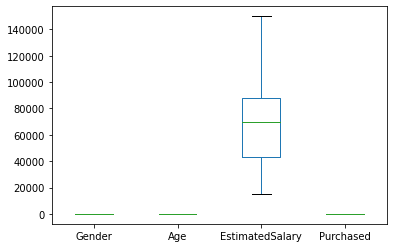

In [ ]:
# Não há necessidade de processamento de Outliers

df[['Gender', 'Age', 'EstimatedSalary', 'Purchased']].plot(kind = 'box')

## **Regressão Linear**

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

predictedCV = cross_val_predict(LinearRegression(), df, df['Purchased'], cv=10)

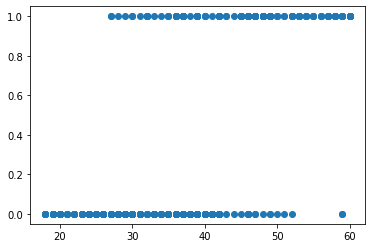

In [ ]:
plt.scatter(df['Age'], predictedCV)

In [ ]:
kfold  = KFold(n_splits=10, shuffle=True)

# Cópia para não enviar a coluna purchased junto as outras
dfCopy = df.copy()
del dfCopy['Purchased']

linearRegression_result = cross_val_score(LinearRegression(), dfCopy, df['Purchased'], cv=kfold)

print(f'LinearRegression R2: {linearRegression_result.mean():.2f} +- {linearRegression_result.std():.2f}')

LinearRegression R2: 0.43 +- 0.08


## **Classe runregression**

In [ ]:

class runregression:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: quantidade de folds da validação cruzada

    Guarda as métricas de cada execução em resultados e 
    Mostra os valores médios com desvio padrão para as métricas (mostraresultadomedio)   
  '''

  def __init__(self, X, y, model, cv = 5):
    
    self.__resultados = {
      'MAE': [],
      'MSE': [],
      'RMSE': [],
      'R2': []
    }

    print(f'validação cruzada com {cv} folds')
    self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    kf = KFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in kf.split(X, y):
      model.fit(X[train_index], y[train_index])
      pred = model.predict(X[test_index])
      self.__resultados['MAE'].append(metrics.mean_absolute_error(y[test_index], pred))
      self.__resultados['MSE'].append(metrics.mean_squared_error(y[test_index], pred))
      self.__resultados['RMSE'].append(np.sqrt(metrics.mean_squared_error(y[test_index], pred)))
      self.__resultados['R2'].append(metrics.r2_score(y[test_index], pred))

  def mostraresultadomedio(self):
    print(f"MAE: {np.mean(self.__resultados['MAE']):.2f} +- {np.std(self.__resultados['MAE']):.2f}")
    print(f"MSE: {np.mean(self.__resultados['MSE']):.2f} +- {np.std(self.__resultados['MSE']):.2f}")
    print(f"RMSE: {np.mean(self.__resultados['RMSE']):.2f} +- {np.std(self.__resultados['RMSE']):.2f}")
    print(f"R2: {np.mean(self.__resultados['R2']):.2f} +- {np.std(self.__resultados['R2']):.2f}")

### Linear Regression

In [ ]:
dfCopy = dfCopy.to_numpy()

cross_validation_RL = runregression(dfCopy, df['Purchased'], LinearRegression(), cv = 10)
cross_validation_RL.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 0.30 +- 0.02
MSE: 0.13 +- 0.01
RMSE: 0.36 +- 0.02
R2: 0.42 +- 0.09


## KNN Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(dfCopy, df['Purchased'], test_size=0.33)

#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid_knn,  cv = 10, verbose = 1) 
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    2.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
gridknn.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

#### Teste com os melhores parâmetros

In [ ]:
pred = gridknn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 0.2685185185185185
MSE: 0.13496071829405162
RMSE: 0.36737000189734004
R2: 0.4113753302739537


#### Validação cruzada com a classe runregression

In [ ]:
knn = gridknn.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_knn = runregression(dfCopy, df['Purchased'], knn, cv = 10)
cross_validation_knn.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 0.27 +- 0.05
MSE: 0.15 +- 0.04
RMSE: 0.38 +- 0.06
R2: 0.36 +- 0.18


## SVM regressor

In [ ]:
from sklearn.svm import SVR

param_grid_svm = {
    'C': [1, 10, 100], 
    'gamma': ['auto', 'scale'], 
    'kernel': ['rbf', 'sigmoid']
} 
gridsvm = GridSearchCV(SVR(),param_grid_svm, verbose = 3)
gridsvm.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.154, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.054, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.045, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.131, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.015, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, gamma=auto, kernel=sigmoid, score=-0.278, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, g

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
gridsvm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

####Teste com os melhores parâmetros

In [ ]:
pred = gridsvm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 0.27287839097839234
MSE: 0.181739402927767
RMSE: 0.426309046265461
R2: 0.20735235128575424


#### Validação cruzada com a classe runregression

In [ ]:
svm = gridsvm.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_svm = runregression(dfCopy, df['Purchased'], svm, cv = 10)
cross_validation_svm.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 0.26 +- 0.04
MSE: 0.18 +- 0.04
RMSE: 0.43 +- 0.05
R2: 0.19 +- 0.17


## MLP regressor

####Escolha dos melhores parâmetros com GridSearchCV

In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(100, ), (13,)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [1000, 5000]
}

gridmlp = GridSearchCV(MLPRegressor(),param_grid_mlp, verbose = 1)
gridmlp.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   15.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity', '

In [ ]:
gridmlp.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.001,
 'max_iter': 5000}

####Teste com os melhores parâmetros

In [ ]:
pred = gridmlp.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 0.4558859472786909
MSE: 0.22936792031056605
RMSE: 0.478923710324062
R2: -0.0003771322881858108


#### Validação cruzada com a classe runregression

In [ ]:
mlp = gridmlp.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_mlp = runregression(dfCopy, df['Purchased'], mlp, cv = 10)
cross_validation_mlp.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 0.46 +- 0.03
MSE: 0.23 +- 0.03
RMSE: 0.48 +- 0.03
R2: -0.04 +- 0.06
